(-0.5, 1919.5, 1079.5, -0.5)

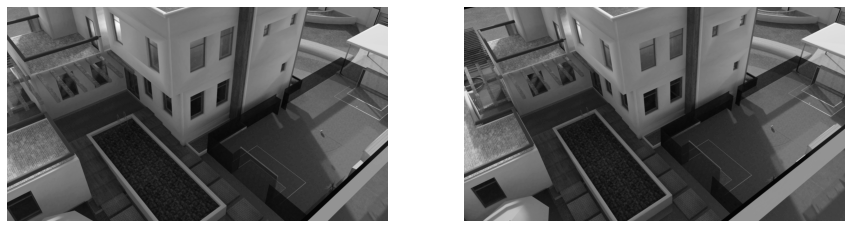

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter

im1 = cv2.imread('./Frame1.png', 0)
im2 = cv2.imread('./Frame2.png', 0)
f, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(im1, cmap='gray')
axs[0].axis('off')

axs[1].imshow(im2, cmap='gray')
axs[1].axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

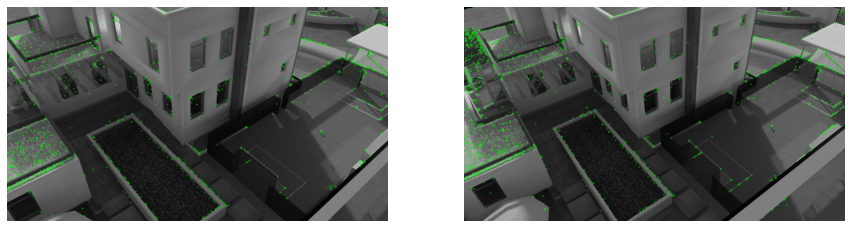

In [30]:
# Initiate ORB detector
orb = cv2.SIFT_create()

# detect the key points and corresponding feature descriptor
kp_1, des_1 = orb.detectAndCompute(im1, None)
kp_2, des_2 = orb.detectAndCompute(im2, None)

# draw the key points
im1_keypoints = cv2.drawKeypoints(im1, kp_1, None, [0, 255, 0], flags=0)
im2_keypoints = cv2.drawKeypoints(im2, kp_2, None, [0, 255, 0], flags=0)


f, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(im1_keypoints)
axs[0].axis('off')

axs[1].imshow(im2_keypoints)
axs[1].axis('off')


In [31]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des_1, des_2) 

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
print(matches[0])
# Draw all matches.

img3 = cv2.drawMatches(im1, kp_1, im2, kp_2, matches[:50], None)

plt.imshow(img3),plt.show()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\batch_distance.cpp:282: error: (-215:Assertion failed) (type == CV_8U && dtype == CV_32S) || dtype == CV_32F in function 'cv::batchDistance'


In [ ]:
kp_1[0].pt

(1760.0, 819.0)

In [ ]:
pts1 = np.array([k.pt for k in kp_1])
pts2 = np.array([k.pt for k in kp_2])

fundamental_matrix, inliers = cv2.findFundamentalMat(pts1, pts2, cv2.FM_8POINT)

In [ ]:
fundamental_matrix

array([[ 2.36535278e-08,  6.90097148e-08, -5.68561898e-05],
       [ 7.41797952e-07,  4.39096870e-06, -2.73262163e-03],
       [-2.61818052e-04, -1.63309015e-03,  1.00000000e+00]])

In [ ]:
from copy import deepcopy


p1 = np.ones((500,3))
p2 = np.ones((500,3))
p1[:,:2] = pts1
p2[:,:2] = pts2
F = deepcopy(fundamental_matrix)
p2.dot(F).dot(p1.T)

array([[-0.65696989,  0.31221497, -0.22803993, ..., -0.07758569,
         0.18163179,  0.18351647],
       [ 0.22572092, -0.08296592,  0.08823383, ...,  0.02232735,
        -0.0699437 , -0.0646455 ],
       [ 0.47979835, -0.17171951,  0.18943716, ...,  0.04663394,
        -0.15011189, -0.137716  ],
       ...,
       [ 0.28626345, -0.09777573,  0.11492677, ...,  0.02699007,
        -0.09101265, -0.08247251],
       [ 0.82091642, -0.31927041,  0.31376355, ...,  0.08432504,
        -0.24893681, -0.23395756],
       [ 0.19818178, -0.06279905,  0.08155377, ...,  0.01781401,
        -0.06452587, -0.05741682]])